In [175]:
import numpy as np

For question 3

In [176]:
z = np.array([
    [0.2785, 0.1576, 0.8003, 0.7922, 0.8491, 0.7431, 0.7060, 0.0971],
    [0.5469, 0.9706, 0.1419, 0.9595, 0.9340, 0.3922, 0.0318, 0.8235],
    [0.9575, 0.9572, 0.4218, 0.6557, 0.6787, 0.6555, 0.2769, 0.6948]
]).T

m = np.array([
    [0.5391, 0.2632, 0.4950, 0.2118, 0.2699, 0.5128, 0.4039, 0.1199],
    [-0.5638, -0.7963, 0.2746, -0.1363, -0.1258, 0.0386, 0.3606, -0.6349],
    [1.8256, 1.5871, 1.6287, 1.4197, 2.1640, 1.1055, 0.5774, 1.1945]
]).T

print(z[0])
print(m[0])

[0.2785 0.5469 0.9575]
[ 0.5391 -0.5638  1.8256]


In [177]:
z_bar = np.mean(z, axis=0)
m_bar = np.mean(m, axis=0)

delta_z = (z - z_bar).reshape(8, 3, 1)
delta_m = (m - m_bar).reshape(8, 3, 1)

print(z_bar, m_bar)

[0.5529875 0.60005   0.6622625] [ 0.35195   -0.1979125  1.4378125]


In [178]:
Q = np.zeros((3, 3))
for i in range(8):
    mult = delta_m[i] @ delta_z[i].T
    for j in range(3):
        for k in range(3):
            Q[j, k] += mult[j, k]
print(Q)

[[ 0.10559398 -0.30095404 -0.03440678]
 [ 0.81961714 -0.8367173  -0.62839881]
 [ 0.00853259  0.68688463  0.45057537]]


In [179]:
U, s, V = np.linalg.svd(Q)

print(U)
print(np.diag(s))
print(V)

print(U @ V.T)
det_UV = np.linalg.det(U @ V.T)
print(det_UV)

[[-0.1876316   0.10854236  0.97622382]
 [-0.86098996 -0.49652316 -0.1102771 ]
 [ 0.472748   -0.86121037  0.18661731]]
[[1.5206567  0.         0.        ]
 [0.         0.46068526 0.        ]
 [0.         0.         0.14118836]]
[[-0.4744405   0.7244219   0.50011911]
 [-0.87444913 -0.45317037 -0.17313385]
 [ 0.10121721 -0.51947044  0.84847248]]
[[ 0.65587868 -0.05413128  0.75292295]
 [-0.00635542  0.99699421  0.07721502]
 [-0.75483957 -0.05542883  0.65356321]]
0.9999999999999996


In [180]:
mid_matrix = np.eye(3)
mid_matrix[2][2] = det_UV

print(mid_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [181]:
R = U @ mid_matrix @ V
print(R, np.linalg.det(R))

[[ 0.09291591 -0.69223203  0.71566853]
 [ 0.83151082 -0.3414247  -0.43819965]
 [ 0.54768275  0.63580185  0.54387463]] 0.9999999999999991


Verifying that RR'=I

In [182]:
print(R @ R.T)

[[ 1.00000000e+00  0.00000000e+00 -4.44089210e-16]
 [ 0.00000000e+00  1.00000000e+00  8.32667268e-17]
 [-4.44089210e-16  8.32667268e-17  1.00000000e+00]]


In [183]:
p = m_bar - R @ z_bar
print(p)

[ 0.24198206 -0.1626525   0.39325011]


In [184]:
print(f"Rotation is \n\n {R} \n and translation is \n\n {p}")

Rotation is 

 [[ 0.09291591 -0.69223203  0.71566853]
 [ 0.83151082 -0.3414247  -0.43819965]
 [ 0.54768275  0.63580185  0.54387463]] 
 and translation is 

 [ 0.24198206 -0.1626525   0.39325011]


In [185]:
def Kabsch(m, z):
    # Kabsch algorithm
    # From m to z
    # z: source point cloud
    # m: target point cloud

    z_bar = np.mean(z, axis=0)
    m_bar = np.mean(m, axis=0)

    delta_z = (z - z_bar).reshape(len(z), 3, 1)
    delta_m = (m - m_bar).reshape(len(m), 3, 1)

    Q = np.zeros((3, 3))
    for i in range(len(z)):
        mult = delta_m[i] @ delta_z[i].T
        Q += mult

    # SVD
    U, s, Vt = np.linalg.svd(Q)
    det_UV = np.linalg.det(U @ Vt)
    mid_matrix = np.eye(3)
    mid_matrix[2][2] = det_UV

    R = U @ mid_matrix @ Vt
    p = m_bar - R @ z_bar

    return R, p

In [186]:
print(R, p)
m_hat = np.zeros((8, 3))
for i in range(len(m)):
    m_hat[i] = R @ z[i] + p
    print(m_hat[i], m[i])

R, p = Kabsch(m, z)
print(R, p)
m_hat = (R @ z.T).T + p


for i in range(len(m)):
    print(m_hat[i], m[i])

[[ 0.09291591 -0.69223203  0.71566853]
 [ 0.83151082 -0.3414247  -0.43819965]
 [ 0.54768275  0.63580185  0.54387463]] [ 0.24198206 -0.1626525   0.39325011]
[ 0.57453007 -0.53737807  1.41425975] [ 0.5391 -0.5638  1.8256]
[ 0.26978312 -0.78243792  1.61727099] [ 0.2632 -0.7963  1.5871]
[0.51998393 0.26952483 1.15118722] [0.495  0.2746 1.6287]
[ 0.12065727 -0.11885414  1.79379486] [ 0.2118 -0.1363  1.4197]
[ 0.16005648 -0.07291344  1.82125417] [ 0.2699 -0.1258  2.164 ]
[0.50865519 0.03409655 1.40610447] [0.5128 0.0386 1.1055]
[0.48373633 0.29219935 0.95073152] [0.4039 0.3606 0.5774]
[ 0.17819762 -0.66753716  1.34789702] [ 0.1199 -0.6349  1.1945]
[[ 0.09291591 -0.69223203  0.71566853]
 [ 0.83151082 -0.3414247  -0.43819965]
 [ 0.54768275  0.63580185  0.54387463]] [ 0.24198206 -0.1626525   0.39325011]
[ 0.57453007 -0.53737807  1.41425975] [ 0.5391 -0.5638  1.8256]
[ 0.26978312 -0.78243792  1.61727099] [ 0.2632 -0.7963  1.5871]
[0.51998393 0.26952483 1.15118722] [0.495  0.2746 1.6287]
[ 0.1206

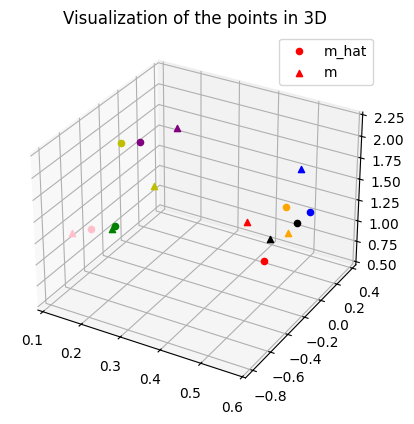

In [187]:
import matplotlib.pyplot as plt
# Plotting the points in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y', 'purple', 'orange', 'black', 'pink']
for i in range(8):
    ax.scatter(m_hat[i, 0], m_hat[i, 1], m_hat[i, 2], c=colors[i], marker='o')
    ax.scatter(m[i, 0], m[i, 1], m[i, 2], c=colors[i], marker='^')
plt.legend(["m_hat", "m"])
plt.title("Visualization of the points in 3D")
plt.show()

Problem 4

Importing coordinates for both cameras

In [188]:
import numpy as np
import matplotlib.pyplot as plt

k = np.eye(3)

cam1 = np.array([
    [[0.2953, -0.3088, 1]],
    [[0.1658, -0.5017, 1]],
    [[0.3040,  0.1686, 1]],
    [[0.1492, -0.0960, 1]],
    [[0.1247, -0.0581, 1]],
    [[0.4638,  0.0349, 1]],
    [[0.6996,  0.6246, 1]],
    [[0.1004, -0.5315, 1]],
])

cam2 = np.array([
    [[0.2909,  0.5712, 1]],
    [[0.1647,  1.0140, 1]],
    [[1.8975,  0.3364, 1]],
    [[1.2081,  1.4632, 1]],
    [[1.2510,  1.3761, 1]],
    [[1.1337,  0.5984, 1]],
    [[2.5496,  0.1150, 1]],
    [[0.1398,  1.1851, 1]]
])

cam1 = cam1 @ np.linalg.inv(k)
cam2 = cam2 @ np.linalg.inv(k)

Camera observation model:
z=PKpi(R'(m-p))
P=[I 0]
K=I


Using 8 points algorithm

In [189]:
y_bar = np.zeros((8, 9))
for i in range(8):
    y_bar[i] = (cam1[i].T@cam2[i]).reshape((9))

print(y_bar, y_bar.shape)

[[ 0.08590277  0.16867536  0.2953     -0.08982992 -0.17638656 -0.3088
   0.2909      0.5712      1.        ]
 [ 0.02730726  0.1681212   0.1658     -0.08262999 -0.5087238  -0.5017
   0.1647      1.014       1.        ]
 [ 0.57684     0.1022656   0.304       0.3199185   0.05671704  0.1686
   1.8975      0.3364      1.        ]
 [ 0.18024852  0.21830944  0.1492     -0.1159776  -0.1404672  -0.096
   1.2081      1.4632      1.        ]
 [ 0.1559997   0.17159967  0.1247     -0.0726831  -0.07995141 -0.0581
   1.251       1.3761      1.        ]
 [ 0.52581006  0.27753792  0.4638      0.03956613  0.02088416  0.0349
   1.1337      0.5984      1.        ]
 [ 1.78370016  0.080454    0.6996      1.59248016  0.071829    0.6246
   2.5496      0.115       1.        ]
 [ 0.01403592  0.11898404  0.1004     -0.0743037  -0.62988065 -0.5315
   0.1398      1.1851      1.        ]] (8, 9)


Singular vector corresponding to the 0 singular value

In [190]:
print(f"y_bar is of shape {y_bar.shape}")

u, s, v = np.linalg.svd(y_bar)
print(s)
s = np.diag(s)
print(u.shape, s.shape, v.shape)

# V is already transposed, so the last row is actually the last column
e = v[-1, :]
print(e)

# Vec() in the slides stacks columns of a matrix into a single column vector
# So, we have to reshape AND transpose
E = e.reshape((3, 3)).T

print(E)


y_bar is of shape (8, 9)
[5.36947521e+00 2.98135697e+00 1.02010748e+00 6.58081018e-01
 3.55167475e-01 1.39349780e-01 3.23372973e-02 2.31736074e-03]
(8, 8) (8, 8) (9, 9)
[-0.54348456  0.25094916  0.37614438  0.19959236 -0.39738898  0.54908277
  0.01514375 -0.01958218  0.01745453]
[[-0.54348456  0.19959236  0.01514375]
 [ 0.25094916 -0.39738898 -0.01958218]
 [ 0.37614438  0.54908277  0.01745453]]


The singular values are pretty close to each other, we can keep the first two the same and change the third one to 0. Having them the same doesn't change the answer significantly and only the translation changes.

In [191]:
U, S, V = np.linalg.svd(E)

print(f"Singular values are {S}")
# Enforcing rank 2
S = np.diag([S[0], S[1], 0])

E = U @ S @ V
print(E)

Singular values are [7.08472995e-01 7.05737910e-01 1.36056443e-04]
[[-0.54348354  0.19958917  0.01522192]
 [ 0.25095049 -0.39739313 -0.01948055]
 [ 0.37614497  0.54908093  0.01749967]]


In [192]:
import transforms3d as t3d

W = t3d.euler.euler2mat(0, 0, np.pi / 2)
print(W)

[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [-0.000000e+00  0.000000e+00  1.000000e+00]]


For better accuracy

In [193]:
W = np.array([[0.0, -1.0, 0.0], 
              [1.0, 0.0, 0.0], 
              [0.0, 0.0, 1.0]])

In [194]:
R1 = U @ W @ V
print(np.linalg.det(R1))

R2 = U @ W.T @ V
print(np.linalg.det(R2))

print(R1, "\n\n",R2)

-0.9999999999999991
-0.9999999999999993
[[ 0.27389008  0.79113502 -0.54689085]
 [-0.57161019 -0.32340161 -0.75410423]
 [ 0.77346365 -0.51915005 -0.36364435]] 

 [[-0.2888588  -0.74425842 -0.60219598]
 [ 0.55214875  0.38434779 -0.73987062]
 [-0.78210763  0.54621989 -0.29991912]]


Let's multiply R1, R2 by -1 since determinent can't be negative

In [195]:
R1 *= -1
R2 *= -1

print(R1, np.linalg.det(R1))
print(R2, np.linalg.det(R2))

[[-0.27389008 -0.79113502  0.54689085]
 [ 0.57161019  0.32340161  0.75410423]
 [-0.77346365  0.51915005  0.36364435]] 0.9999999999999991
[[ 0.2888588   0.74425842  0.60219598]
 [-0.55214875 -0.38434779  0.73987062]
 [ 0.78210763 -0.54621989  0.29991912]] 0.9999999999999993


p1 and p2 are just opposites of each other. We will continue with p1 and -p1 from now on.

In [196]:
p1_hat = U @ W @ S @ U.T

print(p1_hat)

p1 = np.array([-p1_hat[1][2], p1_hat[0][2], -p1_hat[0][1]])

p2_hat = U @ W.T @ S @ U.T
p2 = np.array([-p2_hat[1][2], p2_hat[0][2], -p2_hat[0][1]])

print(p1, p2)

[[ 7.22503554e-04 -2.35005036e-01  5.27849122e-01]
 [ 2.34634352e-01 -2.37912847e-04 -4.05778528e-01]
 [-5.29516855e-01  4.07491732e-01 -4.84590707e-04]]
[0.40577853 0.52784912 0.23500504] [-0.40577853 -0.52784912 -0.23500504]


Computing Lambdas, the combination below is unacceptable (assuming that pixels that are given correspond to each other meaning that i-th pixel of the first camera is the same pixel as the i-th pixel in the 2nd camera). Otherwise, all 4 combinations of (R1, p1), (R1, -p1), (R2, p1), (R2, -p1) can be acceptable.

In [197]:
e3 = np.array([0, 0, 1]).reshape((3, 1))

a = R1.T @ p1 - (e3.T @ R1.T @ p1) * cam2[0]
b = (R1.T @ cam1[0].T).reshape((1, 3)) - (e3.T @ R1.T @ cam1[0].T) @ cam2[0]

lambda_1 = (a @ a.T) / (a @ b.T)
m = lambda_1 * cam1[0]
lambda_2 = e3.T @ R1.T @ (m - p1).T
print(f"Lambda 1 is {lambda_1} and lambda 2 is {lambda_2}")

Lambda 1 is [[1.06382875]] and lambda 2 is [[-0.39449877]]


An unacceptable pair

In [198]:
a = R1.T @ -p1 - (e3.T @ R1.T @ -p1) * cam2[0]
b = (R1.T @ cam1[0].T).reshape((1, 3)) - (e3.T @ R1.T @ cam1[0].T) @ cam2[0]

lambda_1 = (a @ a.T) / (a @ b.T)
m = lambda_1 * cam1[0]
lambda_2 = e3.T @ R1.T @ (m + p1).T
print(f"Lambda 1 is {lambda_1} and lambda 2 is {lambda_2}")

Lambda 1 is [[-1.06382875]] and lambda 2 is [[0.39449877]]


Also unacceptable

In [199]:
a = R2.T @ p1 - (e3.T @ R2.T @ p1) * cam2[0]
b = (R2.T @ cam1[0].T).reshape((1, 3)) - (e3.T @ R2.T @ cam1[0].T) @ cam2[0]

lambda_1 = (a @ a.T) / (a @ b.T)
m = lambda_1 * cam1[0]
lambda_2 = e3.T @ R2.T @ (m - p1).T
print(f"Lambda 1 is {lambda_1} and lambda 2 is {lambda_2}")

Lambda 1 is [[-5.99251086]] and lambda 2 is [[-2.19916715]]


This is the only acceptable one.

In [200]:
a = R2.T @ -p1 - (e3.T @ R2.T @ -p1) * cam2[0]
b = (R2.T @ cam1[0].T).reshape((1, 3)) - (e3.T @ R2.T @ cam1[0].T) @ cam2[0]

lambda_1 = (a @ a.T) / (a @ b.T)
m = lambda_1 * cam1[0]
lambda_2 = e3.T @ R2.T @ (m + p1).T
print(f"Lambda 1 is {lambda_1} and lambda 2 is {lambda_2}")

Lambda 1 is [[5.99251086]] and lambda 2 is [[2.19916715]]


So the correct answer would be only R1 and p1

In [201]:
print(f"Correct rotation is \n {R2} \n and correct transformation is {-p1}") 

Correct rotation is 
 [[ 0.2888588   0.74425842  0.60219598]
 [-0.55214875 -0.38434779  0.73987062]
 [ 0.78210763 -0.54621989  0.29991912]] 
 and correct transformation is [-0.40577853 -0.52784912 -0.23500504]
